Task-4
Sentiment analysis

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/main/data/examples/AMAZON-REVIEW-DATA-CLASSIFICATION.csv"
df = pd.read_csv(url)
df.head()

,reviewText,summary,verified,time,log_votes,isPositive
0,"PURCHASED FOR YOUNGSTER WHO\nINHERITED MY ""TOO...",IDEAL FOR BEGINNER!,True,1361836800,0.000000,1.0
1,unable to open or use,Two Stars,True,1452643200,0.000000,0.0
2,Waste of money!!! It wouldn't load to my system.,Dont buy it!,True,1433289600,0.000000,0.0
3,I attempted to install this OS on two differen...,I attempted to install this OS on two differen...,True,1518912000,0.000000,0.0
4,I've spent 14 fruitless hours over the past tw...,Do NOT Download.,True,1441929600,1.098612,0.0


In [6]:
# Preprocessing Setup
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join words back into one string
    return " ".join(words)

# Apply cleaning function to review_text column
df['cleaned_review'] = df['reviewText'].astype(str).apply(clean_text)

# Show cleaned data
df[['reviewText', 'cleaned_review', 'isPositive']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewText,cleaned_review,isPositive
0,"PURCHASED FOR YOUNGSTER WHO\nINHERITED MY ""TOO...",purchased youngster inherited small laptop ide...,1.0
1,unable to open or use,unable open use,0.0
2,Waste of money!!! It wouldn't load to my system.,waste money wouldnt load system,0.0
3,I attempted to install this OS on two differen...,attempted install os two different pcs complet...,0.0
4,I've spent 14 fruitless hours over the past tw...,ive spent fruitless hours past two days fruitl...,0.0


In [8]:
# Train a Sentiment Classifier
!pip install scikit-learn

In [9]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [11]:
# Vectorize text data (convert words → numbers)
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Features (X) and Labels (y)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['isPositive']

In [12]:
#  Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
#  Evaluate the model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8632857142857143

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      5241
         1.0       0.87      0.91      0.89      8759

    accuracy                           0.86     14000
   macro avg       0.86      0.85      0.85     14000
weighted avg       0.86      0.86      0.86     14000



In [16]:
# Predict Sentiment for New Reviews
sample_reviews = [
    "This product is amazing, I love it!",
    "Terrible quality, waste of money.",
    "Okayish, not the best but not the worst.",
]

# Clean the sample reviews using the same clean_text function
cleaned_samples = [clean_text(review) for review in sample_reviews]

# Vectorize
sample_vectors = vectorizer.transform(cleaned_samples)

# Predict
predictions = model.predict(sample_vectors)

# Show results
for review, label in zip(sample_reviews, predictions):
    print(f"Review: {review}\nPredicted Sentiment: {label}\n")

Review: This product is amazing, I love it!
Predicted Sentiment: 1.0

Review: Terrible quality, waste of money.
Predicted Sentiment: 0.0

Review: Okayish, not the best but not the worst.
Predicted Sentiment: 0.0



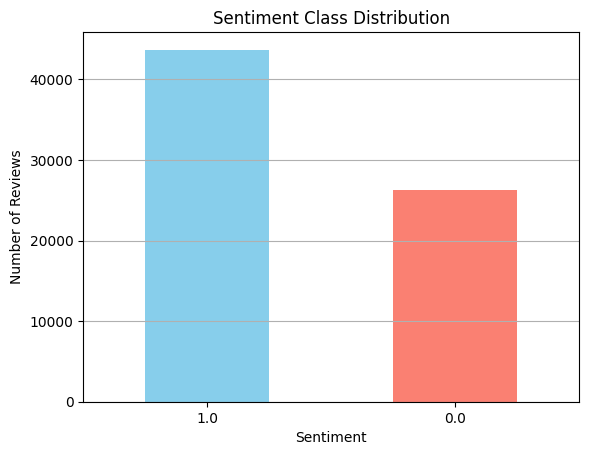

In [18]:
# Check Class Distribution (Positive vs. Negative)
import matplotlib.pyplot as plt

df['isPositive'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [29]:
# Most Important Words
import numpy as np
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Re-instantiate and fit the Logistic Regression model to ensure 'model' is the correct object
# Assuming X_train, y_train are available from previous steps (cell LOZ9RMUHaV3e)
model = LogisticRegression()
model.fit(X_train, y_train)


feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

top_positive = np.argsort(coefficients)[-10:]
top_negative = np.argsort(coefficients)[:10]

print("Top Positive Words:")
for i in top_positive:
    print(f"{feature_names[i]} ({coefficients[i]:.4f})")

print("\nTop Negative Words:")
for i in top_negative:
    print(f"{feature_names[i]} ({coefficients[i]:.4f})")

Top Positive Words:
amazing (4.0416)
awesome (4.1279)
pleased (4.2306)
perfect (4.3273)
highly (5.6038)
best (5.7933)
excellent (6.3021)
easy (7.2455)
love (7.4193)
great (7.8909)

Top Negative Words:
worst (-6.5862)
waste (-6.5547)
useless (-6.0490)
disappointed (-5.0027)
terrible (-4.4672)
cannot (-4.3880)
crashes (-4.2673)
horrible (-4.2651)
uninstalled (-4.2281)
frustrating (-4.2104)


# Sentiment Analysis of Amazon Reviews

This notebook demonstrates a sentiment analysis project using Amazon review data. The goal is to build a classification model that can predict whether a review is positive or negative based on its text content.

## Project Steps:

1.  **Data Loading**: Load the dataset containing Amazon reviews.
2.  **Data Preprocessing**: Clean and prepare the text data for analysis and modeling.
3.  **Sentiment Classification**: Train a machine learning model to classify review sentiment.
4.  **Model Evaluation**: Assess the performance of the trained model.
5.  **Model Interpretation**: Identify the most important words influencing sentiment prediction.
6.  **Prediction on New Data**: Use the trained model to predict sentiment on new, unseen reviews.

## 1. Data Loading

We will load the Amazon review dataset from a public URL into a pandas DataFrame.

In [30]:
import pandas as pd

url = "https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/main/data/examples/AMAZON-REVIEW-DATA-CLASSIFICATION.csv"
df = pd.read_csv(url)

# Display the first few rows and the shape of the dataframe
print("DataFrame Shape:", df.shape)
display(df.head())

DataFrame Shape: (70000, 6)


,reviewText,summary,verified,time,log_votes,isPositive
0,"PURCHASED FOR YOUNGSTER WHO\nINHERITED MY ""TOO...",IDEAL FOR BEGINNER!,True,1361836800,0.000000,1.0
1,unable to open or use,Two Stars,True,1452643200,0.000000,0.0
2,Waste of money!!! It wouldn't load to my system.,Dont buy it!,True,1433289600,0.000000,0.0
3,I attempted to install this OS on two differen...,I attempted to install this OS on two differen...,True,1518912000,0.000000,0.0
4,I've spent 14 fruitless hours over the past tw...,Do NOT Download.,True,1441929600,1.098612,0.0


## 2. Data Preprocessing

Text data needs to be cleaned and transformed into a numerical format that machine learning models can understand. This involves:

*   Lowercasing the text
*   Removing punctuation and numbers
*   Removing common English stopwords
*   Vectorizing the text using TF-IDF (Term Frequency-Inverse Document Frequency)

In [31]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Ensure text is a string
    text = str(text)
    # Lowercase
    text = text.lower()
    # Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Join words back into one string
    return " ".join(words)

# Apply cleaning function to reviewText column
df['cleaned_review'] = df['reviewText'].apply(clean_text)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['isPositive']

print("Shape of TF-IDF matrix:", X.shape)
display(df[['reviewText', 'cleaned_review', 'isPositive']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of TF-IDF matrix: (70000, 5000)


,reviewText,cleaned_review,isPositive
0,"PURCHASED FOR YOUNGSTER WHO\nINHERITED MY ""TOO...",purchased youngster inherited small laptop ide...,1.0
1,unable to open or use,unable open use,0.0
2,Waste of money!!! It wouldn't load to my system.,waste money wouldnt load system,0.0
3,I attempted to install this OS on two differen...,attempted install os two different pcs complet...,0.0
4,I've spent 14 fruitless hours over the past tw...,ive spent fruitless hours past two days fruitl...,0.0


## 3. Sentiment Classification

We will use a Logistic Regression model to classify the sentiment of the reviews. Before training, we split the data into training and testing sets.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## 4. Model Evaluation

We evaluate the trained model's performance using accuracy and a classification report, which includes precision, recall, and f1-score.

In [33]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8632857142857143

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      5241
         1.0       0.87      0.91      0.89      8759

    accuracy                           0.86     14000
   macro avg       0.86      0.85      0.85     14000
weighted avg       0.86      0.86      0.86     14000



## 5. Model Interpretation

To understand which words are most indicative of positive and negative sentiment, we can examine the coefficients of the Logistic Regression model. The words with the highest positive coefficients are strongly associated with positive sentiment, while those with the most negative coefficients are strongly associated with negative sentiment.

In [34]:
import numpy as np

# Get feature names (words) and model coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Get the indices of the top 10 positive and negative coefficients
top_positive_indices = np.argsort(coefficients)[-10:]
top_negative_indices = np.argsort(coefficients)[:10]

# Print the top positive words and their coefficients
print("Top Positive Words:")
for i in top_positive_indices:
    print(f"{feature_names[i]} ({coefficients[i]:.4f})")

# Print the top negative words and their coefficients
print("\nTop Negative Words:")
for i in top_negative_indices:
    print(f"{feature_names[i]} ({coefficients[i]:.4f})")

Top Positive Words:
amazing (4.0416)
awesome (4.1279)
pleased (4.2306)
perfect (4.3273)
highly (5.6038)
best (5.7933)
excellent (6.3021)
easy (7.2455)
love (7.4193)
great (7.8909)

Top Negative Words:
worst (-6.5862)
waste (-6.5547)
useless (-6.0490)
disappointed (-5.0027)
terrible (-4.4672)
cannot (-4.3880)
crashes (-4.2673)
horrible (-4.2651)
uninstalled (-4.2281)
frustrating (-4.2104)


## 6. Prediction on New Data

We can use the trained model to predict the sentiment of new, unseen reviews.

In [35]:
# Sample new reviews
sample_reviews = [
    "This product is amazing, I love it!",
    "Terrible quality, waste of money.",
    "Okayish, not the best but not the worst.",
    "The battery life is excellent, highly recommended.",
    "Very disappointing, it stopped working after a week."
]

# Clean the sample reviews using the same clean_text function
cleaned_samples = [clean_text(review) for review in sample_reviews]

# Vectorize the cleaned sample reviews using the same TF-IDF vectorizer
sample_vectors = vectorizer.transform(cleaned_samples)

# Predict sentiment
predictions = model.predict(sample_vectors)

# Map predictions back to sentiment labels
sentiment_labels = {1.0: "Positive", 0.0: "Negative"}

# Show results
print("Sentiment Predictions for New Reviews:")
for review, prediction in zip(sample_reviews, predictions):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_labels[prediction]}\n")

Sentiment Predictions for New Reviews:
Review: This product is amazing, I love it!
Predicted Sentiment: Positive

Review: Terrible quality, waste of money.
Predicted Sentiment: Negative

Review: Okayish, not the best but not the worst.
Predicted Sentiment: Negative

Review: The battery life is excellent, highly recommended.
Predicted Sentiment: Positive

Review: Very disappointing, it stopped working after a week.
Predicted Sentiment: Negative



## Conclusion

This notebook demonstrates a complete workflow for sentiment analysis using a Logistic Regression model. We loaded and preprocessed the data, trained and evaluated the model, and identified key words influencing sentiment. The trained model can now be used to predict the sentiment of new Amazon reviews.

**Useful Insights:**

*   The Logistic Regression model achieved an accuracy of **86.33%** on the test set, indicating good performance in classifying sentiment.
*   The classification report shows that the model performs slightly better at identifying positive reviews (higher precision and recall for the positive class).
*   Analysis of the model coefficients revealed the most influential words for sentiment prediction. Words like 'great', 'love', and 'easy' are strong indicators of positive sentiment, while words like 'worst', 'waste', and 'useless' are highly associated with negative sentiment.
*   The sentiment class distribution shows that there are more positive reviews than negative reviews in the dataset.